In [2]:
cd ..

/Users/annierumbles/Desktop/Coding/personal_work/driven_data_projects/earthquake


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import f1_score

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

In [4]:
df_vals = pd.read_csv('data/train_values.csv')
df_labels = pd.read_csv('data/train_labels.csv')

In [5]:
df_vals.set_index(df_vals['building_id'], inplace=True)
df_vals.drop(columns='building_id', inplace=True)

In [6]:
df_vals.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df_labels.set_index(df_labels['building_id'], inplace=True)
df_labels.drop(columns='building_id', inplace=True)

In [8]:
df_labels.head()

,damage_grade
building_id,
802906,3
28830,2
94947,3
590882,2
201944,3


In [9]:
level = df_vals['geo_level_3_id'].value_counts()
level_50 = level[level >= 100]
len(level_50)

246

<BarContainer object of 246 artists>

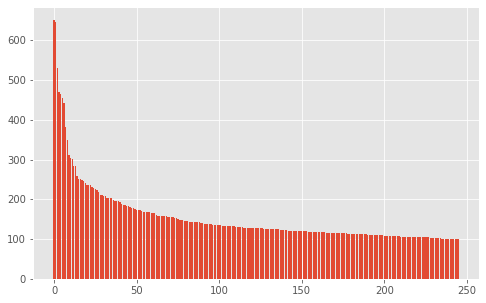

In [10]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.bar(range(len(level_50.index)), level_50.values)

In [11]:
df_vals.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1a222837b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2241da20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a22413f60>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2241de48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a22426438>],
 'means': []}

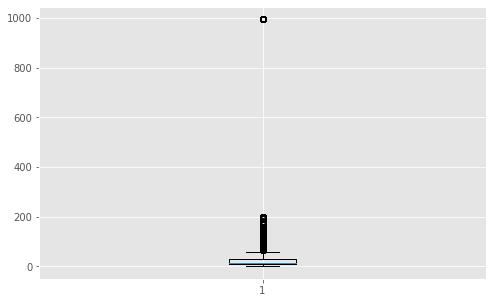

In [12]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
ax.boxplot(df_vals['age'])

In [13]:
df_vals[df_vals['age']==995]

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
435557,14,1120,3789,3,995,12,5,t,r,n,f,q,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,1,1,0,0,0,0,0,0,0,0,0
597626,26,39,1851,2,995,27,6,t,i,x,v,s,j,d,0,0,0,0,0,1,0,0,0,1,0,v,3,0,0,0,0,0,0,0,0,0,0,0
7560,26,1132,9472,2,995,8,5,t,r,q,f,x,s,d,0,1,0,0,0,0,1,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
797271,26,39,1851,2,995,14,6,t,u,n,v,s,t,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
857371,24,628,10750,2,995,10,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160373,27,390,11020,3,995,6,8,n,r,n,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
9269,24,628,11511,2,995,8,5,n,r,n,f,x,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
34321,17,1393,5939,2,995,8,4,t,r,n,f,q,j,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [14]:
one = df_labels[df_labels['damage_grade']==1]
two = df_labels[df_labels['damage_grade']==2]
three = df_labels[df_labels['damage_grade']==3]

In [15]:
df_combined = df_vals.merge(df_labels, left_index=True, right_index=True)

In [16]:
df_combined.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


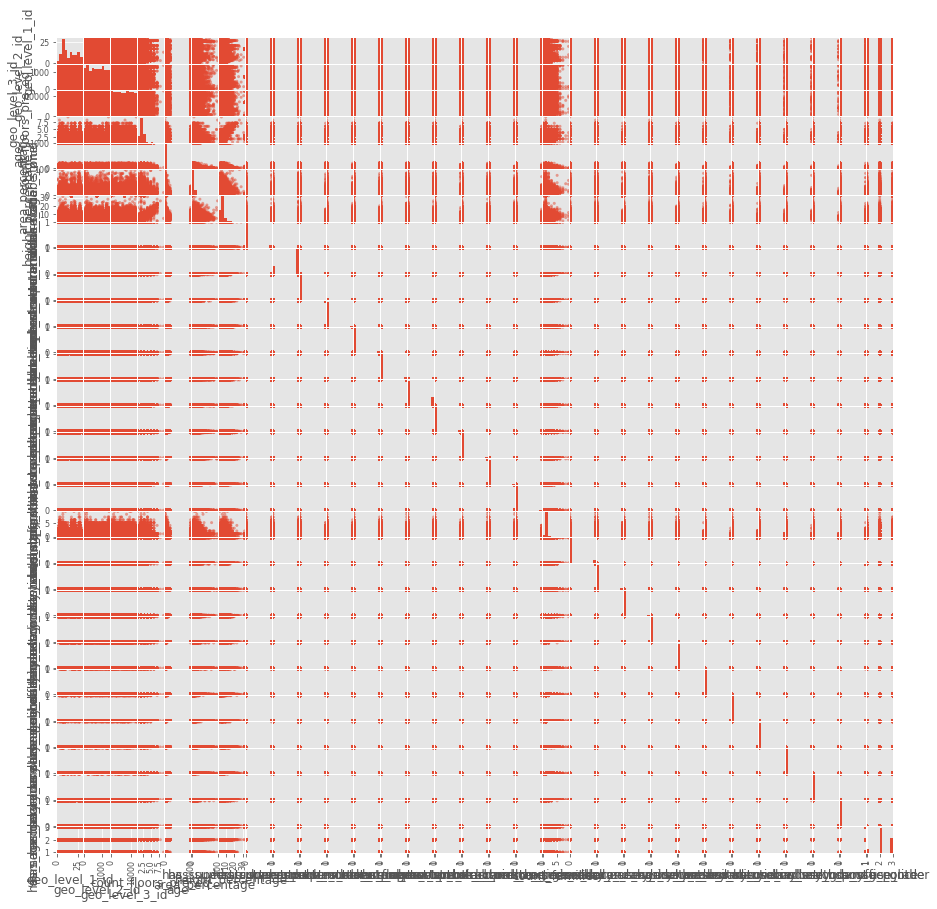

In [90]:
pd.plotting.scatter_matrix(df_combined, figsize=(15,15));

In [17]:
df_combined.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


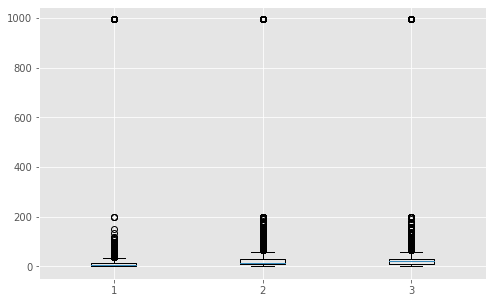

In [18]:
data = [df_combined[df_combined['damage_grade']==1]['age'], df_combined[df_combined['damage_grade']==2]['age'], df_combined[df_combined['damage_grade']==3]['age']]
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.boxplot(data);

In [19]:
old = df_combined[df_combined['age'] >= 800]
middle = df_combined[(df_combined['age'] > 100) & (df_combined['age'] < 800)]
young = df_combined[df_combined['age'] <= 100]

Text(0.5, 1.0, 'Damage Counts for Buildings <= 800 years')

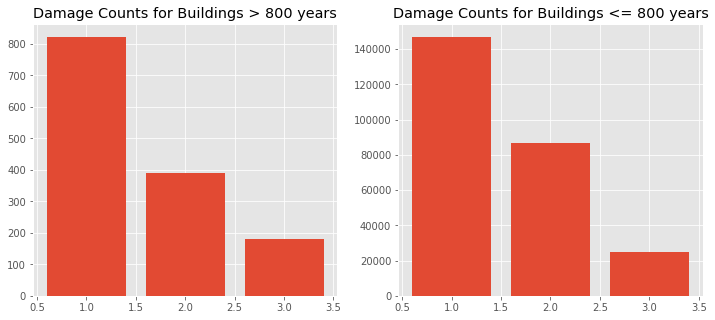

In [20]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].bar([1,2,3], old['damage_grade'].value_counts())
ax[1].bar([1,2,3], young['damage_grade'].value_counts())
ax[0].set_title('Damage Counts for Buildings > 800 years')
ax[1].set_title('Damage Counts for Buildings <= 800 years')

In [21]:
young.describe()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000,258477.000000
mean,13.890191,701.155925,6259.826716,2.126549,21.012450,8.016249,5.428684,0.087741,0.762884,0.034107,0.018272,0.066869,0.075407,0.254440,0.085044,0.042708,0.015912,0.014988,0.983983,0.111875,0.064478,0.033566,0.008032,0.000944,0.000364,0.001076,0.000190,0.000147,0.000089,0.005146,2.238416
std,8.024139,412.817205,3647.892225,0.723780,18.558683,4.389434,1.914656,0.282918,0.425315,0.181506,0.133935,0.249795,0.264048,0.435547,0.278948,0.202198,0.125137,0.121504,0.417387,0.315213,0.245602,0.180109,0.089259,0.030710,0.019067,0.032778,0.013767,0.012124,0.009433,0.071548,0.611975
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,7.000000,350.000000,3072.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,12.000000,704.000000,6276.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,21.000000,1050.000000,9414.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,30.000000,1427.000000,12567.000000,9.000000,100.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [22]:
data_old = [old[old['damage_grade']==1]['age'], old[old['damage_grade']==2]['age'], old[old['damage_grade']==3]['age']]
data_middle = [middle[middle['damage_grade']==1]['age'], middle[middle['damage_grade']==2]['age'], middle[middle['damage_grade']==3]['age']]
data_young = [young[young['damage_grade']==1]['age'], young[young['damage_grade']==2]['age'], young[young['damage_grade']==3]['age']]

''

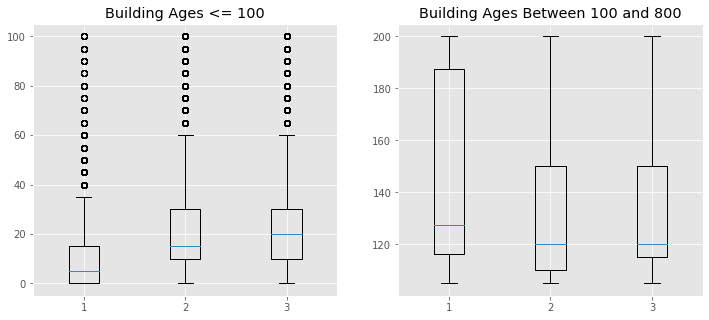

In [23]:
fig, axs = plt.subplots(1,2,figsize=(12,5))
axs[0].boxplot(data_young)
axs[1].boxplot(data_middle)
axs[0].set_title('Building Ages <= 100')
axs[1].set_title('Building Ages Between 100 and 800')
;

In [24]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

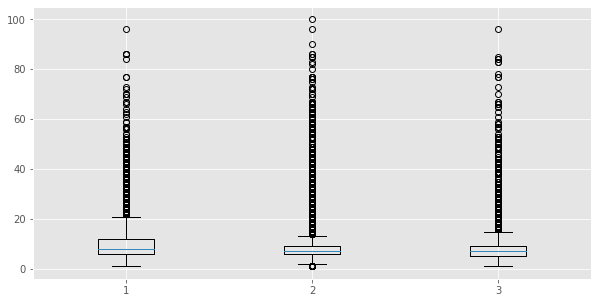

In [25]:
data_age = [df_combined[df_combined['damage_grade']==1]['area_percentage'], df_combined[df_combined['damage_grade']==2]['area_percentage'], df_combined[df_combined['damage_grade']==3]['area_percentage']]
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.boxplot(data_age);

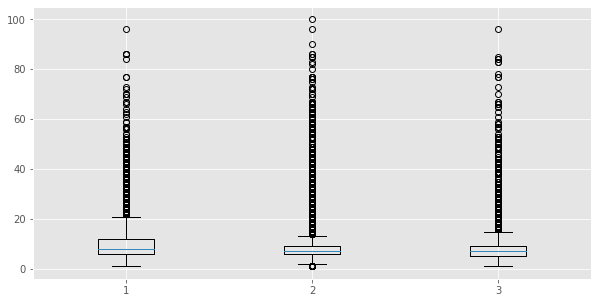

In [26]:
data_height = [df_combined[df_combined['damage_grade']==1]['height_percentage'], df_combined[df_combined['damage_grade']==2]['height_percentage'], df_combined[df_combined['damage_grade']==3]['height_percentage']]
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.boxplot(data_age);

In [27]:
def damage_distributions(col_name, df):
    data = [df[df['damage_grade']==1][col_name], 
            df[df['damage_grade']==2][col_name], 
            df[df['damage_grade']==3][col_name]]
    return data

<BarContainer object of 31 artists>

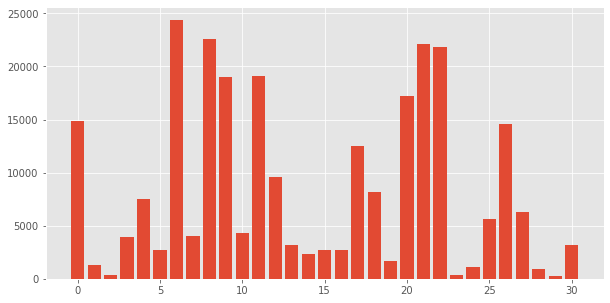

In [28]:
geo1 = damage_distributions('geo_level_1_id', df_combined)
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.bar(df_combined['geo_level_1_id'].unique(), df_combined['geo_level_1_id'].value_counts())

In [29]:
one = df_combined[df_combined['damage_grade']==1]
two = df_combined[df_combined['damage_grade']==2]
three = df_combined[df_combined['damage_grade']==3]

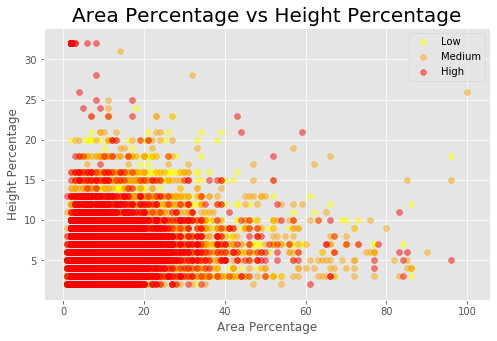

In [30]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.scatter(one['area_percentage'], one['height_percentage'], color='yellow', alpha=.5, label='Low')
ax.scatter(two['area_percentage'], two['height_percentage'], color='orange', alpha=.5, label='Medium')
ax.scatter(three['area_percentage'], three['height_percentage'], color='red', alpha=.5, label='High')
ax.set_title('Area Percentage vs Height Percentage', fontsize=20)
ax.set_ylabel('Height Percentage')
ax.set_xlabel('Area Percentage')
ax.legend();

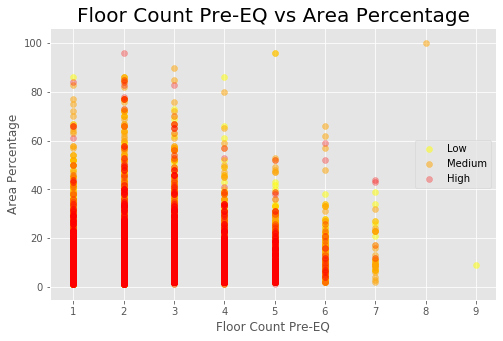

In [31]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.scatter(one['count_floors_pre_eq'], one['area_percentage'], color='yellow', alpha=.5, label='Low')
ax.scatter(two['count_floors_pre_eq'], two['area_percentage'], color='orange', alpha=.5, label='Medium')
ax.scatter(three['count_floors_pre_eq'], three['area_percentage'], color='red', alpha=.3, label='High')
ax.set_title('Floor Count Pre-EQ vs Area Percentage', fontsize=20)
ax.set_ylabel('Area Percentage')
ax.set_xlabel('Floor Count Pre-EQ')
ax.legend();

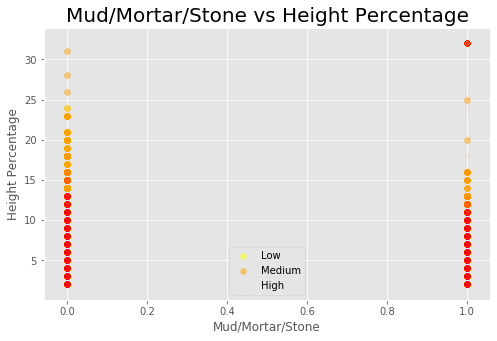

In [32]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.scatter(one['has_superstructure_mud_mortar_stone'], one['height_percentage'], color='yellow', alpha=.5, label='Low')
ax.scatter(two['has_superstructure_mud_mortar_stone'], two['height_percentage'], color='orange', alpha=.5, label='Medium')
ax.scatter(three['has_superstructure_mud_mortar_stone'], three['height_percentage'], color='red', alpha=.01, label='High')
ax.set_title('Mud/Mortar/Stone vs Height Percentage', fontsize=20)
ax.set_ylabel('Height Percentage')
ax.set_xlabel('Mud/Mortar/Stone')
ax.legend();

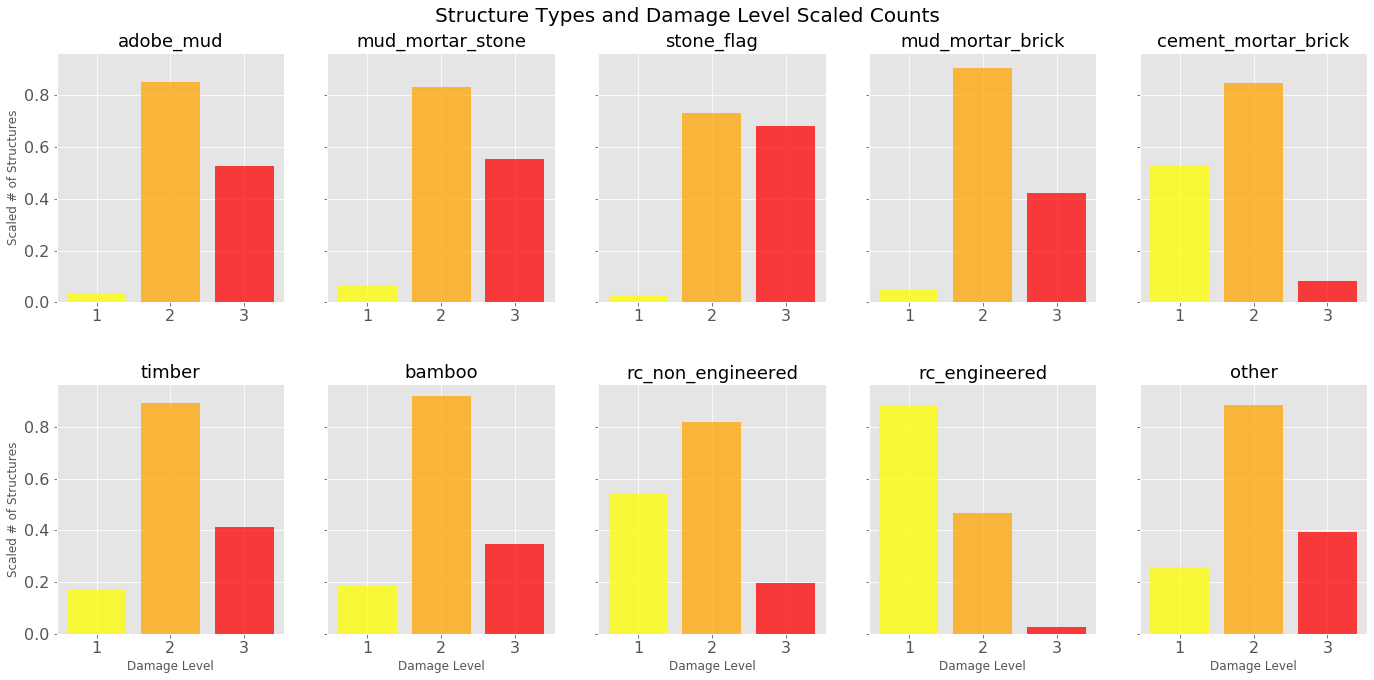

In [35]:
data_has = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
            'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 
            'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered',
            'has_superstructure_other']

fig, axs = plt.subplots(2,5,figsize=(20,10), sharey=True)
fig.suptitle('Structure Types and Damage Level Scaled Counts', fontsize=20)
plt.setp(axs[:, 0], ylabel='Scaled # of Structures')
plt.setp(axs[-1, :], xlabel='Damage Level')
for i, ax in enumerate(axs.flatten()):
    norm = Normalizer().fit(np.array([one[data_has[i]].sum(), two[data_has[i]].sum(), three[data_has[i]].sum()]).reshape(1,-1))
    normed=norm.transform(np.array([one[data_has[i]].sum(), two[data_has[i]].sum(), three[data_has[i]].sum()]).reshape(1,-1))
    ax.bar([1,2,3], normed[0], 
           color= ['yellow', 'orange', 'red'], label=['Low', 'Medium', 'High'], alpha=.75)
    title = data_has[i].replace('has_superstructure_', '')
    ax.set_title(f'{title}', fontsize=18)
    ax.tick_params(labelsize=16)
plt.tight_layout(pad=4)
# plt.savefig('images/structure_types_damage_counts.png', dpi=100)

In [36]:
normed[0]

array([0.25758507, 0.88270006, 0.39305283])

In [37]:
counts = [df_combined[i].sum() for i in data_has]
counts

[23101, 198561, 8947, 17761, 19615, 66450, 22154, 11099, 4133, 3905]

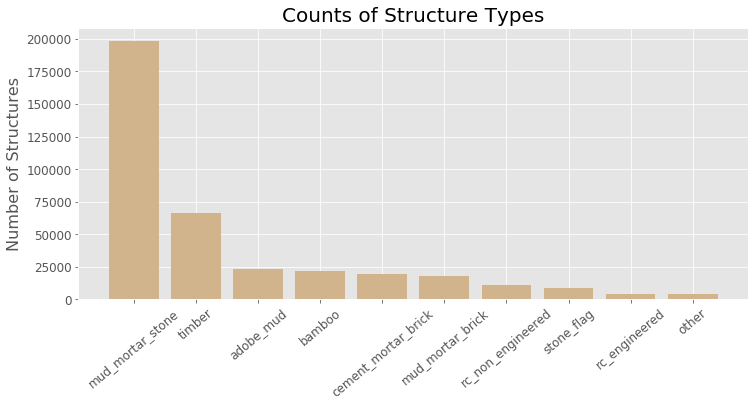

In [38]:
title = [i.replace('has_superstructure_', '') for i in data_has]
count_dict = {title[i]: counts[i] for i in range(len(title))}
sorted_count = {k: v for k, v in sorted(count_dict.items(), key=lambda item: item[1], reverse=True)}
fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.bar(list(sorted_count.keys()), list(sorted_count.values()), color='tan')
ax.set_xticks(list(sorted_count.keys()))
ax.set_title('Counts of Structure Types', fontsize=20)
ax.set_ylabel('Number of Structures', fontsize=16)
plt.xticks(rotation=40)
plt.tick_params(labelsize=12);

In [39]:
from sklearn.preprocessing import Normalizer

norm = Normalizer().fit(np.array(counts).reshape(1, -1))
norm_counts =norm.transform(np.array(counts).reshape(1, -1))

In [40]:
norm_counts[0]

array([0.10794118, 0.92779135, 0.04180554, 0.08298962, 0.09165258,
       0.31049267, 0.10351625, 0.05186092, 0.01931176, 0.01824641])

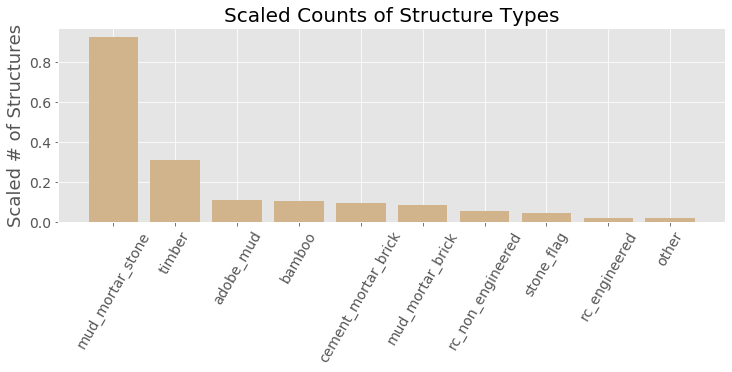

In [41]:
title = [i.replace('has_superstructure_', '') for i in data_has]
count_dict = {title[i]: norm_counts[0][i] for i in range(len(title))}
sorted_count = {k: v for k, v in sorted(count_dict.items(), key=lambda item: item[1], reverse=True)}
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.bar(list(sorted_count.keys()), list(sorted_count.values()), color='tan')
ax.set_xticks(list(sorted_count.keys()))
ax.set_title('Scaled Counts of Structure Types', fontsize=20)
ax.set_ylabel('Scaled # of Structures', fontsize=18)
plt.xticks(rotation=60)
plt.tick_params(labelsize=14)
plt.tight_layout(pad=.1)
# plt.savefig('images/scaled_structure_counts.png', dpi=100);

In [42]:
all_counts = [[dam[i].sum() for i in data_has] for dam in [one, two, three]]
all_norm =Normalizer().fit(np.array(all_counts))
all_norm_counts = all_norm.transform(np.array(all_counts))

In [43]:
df_combined.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 802906 to 747594
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   geo_level_1_id                          260601 non-null  int64 
 1   geo_level_2_id                          260601 non-null  int64 
 2   geo_level_3_id                          260601 non-null  int64 
 3   count_floors_pre_eq                     260601 non-null  int64 
 4   age                                     260601 non-null  int64 
 5   area_percentage                         260601 non-null  int64 
 6   height_percentage                       260601 non-null  int64 
 7   land_surface_condition                  260601 non-null  object
 8   foundation_type                         260601 non-null  object
 9   roof_type                               260601 non-null  object
 10  ground_floor_type                       260601 non-

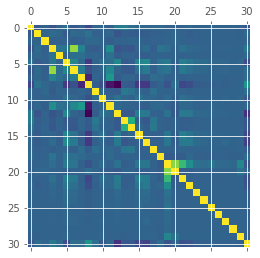

In [47]:

plt.matshow(df_combined.corr())


In [48]:
df_combined.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [49]:
df_combined['land_surface_condition'].value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

In [50]:
df_combined['foundation_type'].value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

In [51]:
df_combined['roof_type'].value_counts()

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

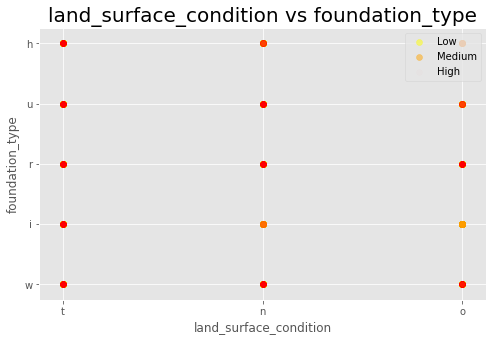

In [52]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
ax.scatter(one['land_surface_condition'], one['foundation_type'], color='yellow', alpha=.5, label='Low')
ax.scatter(two['land_surface_condition'], two['foundation_type'], color='orange', alpha=.5, label='Medium')
ax.scatter(three['land_surface_condition'], three['foundation_type'], color='red', alpha=.5, label='High')
ax.set_title('land_surface_condition vs foundation_type', fontsize=20)
ax.set_ylabel('foundation_type')
ax.set_xlabel('land_surface_condition')
ax.legend();

In [53]:
df_combined['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

In [54]:
from sklearn.decomposition import PCA

In [65]:
ss = StandardScaler()
X_scaled = ss.fit_transform(df_combined[['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage']])
X_scaled

array([[-0.17827372,  0.0471003 , -0.45946001, -0.22641883],
       [-0.17827372, -0.22476517, -0.00410967,  0.81610871],
       [-0.17827372, -0.22476517, -0.68713518, -0.22641883],
       ...,
       [ 1.19598853,  0.38693215, -0.45946001,  0.81610871],
       [-0.17827372, -0.22476517,  1.36194134,  0.29484494],
       [ 1.19598853, -0.22476517, -0.23178484,  0.29484494]])

In [66]:
pca = PCA(n_components=2, random_state=42)
pca.fit(df_combined[['count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage']])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [75]:
principalComponents = pca.fit_transform(X_scaled)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'], index=df_combined.index)

In [79]:
pca_df = pd.concat([principalDf, df_combined[['damage_grade']]], axis=1)
pca_df.head()

,principal component 1,principal component 2,damage_grade
building_id,,,
802906,-0.381423,0.269359,3
28830,0.412886,-0.225936,2
94947,-0.468722,0.151299,3
590882,-0.413652,0.035798,2
201944,2.088740,0.060647,3


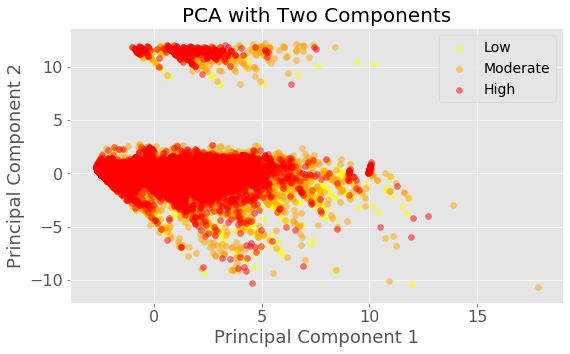

In [109]:
targets = [1, 2, 3]
labels = ['Low', 'Moderate', 'High']
color = ['yellow', 'orange', 'red']
fig, ax = plt.subplots(1,1,figsize=(8,5))
for t, c in zip(targets, color):
    idx = pca_df['damage_grade'] == t
    ax.scatter(pca_df.loc[idx, 'principal component 1'], pca_df.loc[idx, 'principal component 2'], color=c, 
               alpha=.5, label=labels[t-1])
ax.set_title('PCA with Two Components', fontsize=20)
ax.set_xlabel('Principal Component 1', fontsize=18)
ax.set_ylabel('Principal Component 2', fontsize=18)
plt.tick_params(labelsize=16)
ax.legend(fontsize=14)
plt.tight_layout(pad=1)
# plt.savefig('images/pca_twocomponents.png', dpi=100)

In [82]:
pca.explained_variance_ratio_

array([0.4596179 , 0.25165127])

In [83]:
pca_3 = PCA(n_components=3, random_state=42)
pc_3 = pca_3.fit_transform(X_scaled)

In [95]:
pc3_df = pd.DataFrame(data = pc_3
             , columns = ['pc1', 'pc2', 'pc3'], index=df_combined.index)
pca_3_df = pd.concat([pc3_df, df_combined[['damage_grade']]], axis=1)

In [96]:
pca_3_df.head()

,pc1,pc2,pc3,damage_grade
building_id,,,,
802906,-0.381423,0.269359,-0.279832,3
28830,0.412886,-0.225936,-0.189903,2
94947,-0.468722,0.151299,-0.602286,3
590882,-0.413652,0.035798,-0.415066,2
201944,2.088740,0.060647,-0.528769,3


In [97]:
from mpl_toolkits.mplot3d import Axes3D

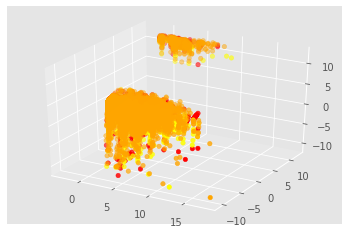

In [99]:
targets = [1, 2, 3]
color = ['yellow', 'orange', 'red']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for t, c in zip(targets, color):
    idx = pca_3_df['damage_grade'] == t
    ax.scatter(pca_3_df.loc[idx, 'pc1'], pca_3_df.loc[idx, 'pc2'], pca_3_df.loc[idx, 'pc2'], color=c)
